Questions: 
1. Which age group use the most drugs of any group? 

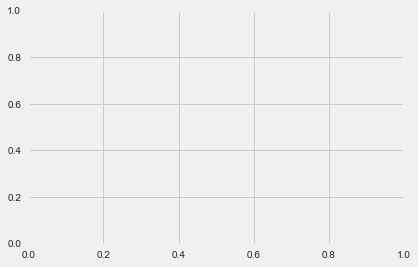

In [25]:
from IPython.core.debugger import Tracer; 
import pandas as pd
import numpy as np
import math
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats  as stats

#https://github.com/fivethirtyeight/data/blob/master/drug-use-by-age/drug-use-by-age.csv
drug_use_by_age_df = pd.read_csv('data/drug-use-by-age.csv', index_col=0).replace('-', np.nan)
max_age_group_dict = {}
drug_use_by_age_df.head(10)
for key in list(drug_use_by_age_df): 
    max_age_group_dict[key] = drug_use_by_age_df[key].dropna().argmax()
fig, ax = plt.subplots()
